In [141]:
import pandas as pd

# Load the datasets
reddit_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_western.csv')  # Western data
youtube_western = pd.read_csv('Q2/cleaned for ICM/cleaned_youtube_asian.csv')  # Asian data

# Display the first few rows to understand the data
print("Asian YouTube Data:")
print(reddit_asian.head())

print("\nWestern YouTube Data:")
print(youtube_western.head())

# Check column names to ensure 'author' column is present and preview its content
print("\nColumns in Asian YouTube Dataset:", reddit_asian.columns)
print("\nColumns in Western YouTube Dataset:", youtube_western.columns)

# Count how many missing 'author' values are there
missing_authors_asian = youtube_asian['author'].isna().sum()
missing_authors_western = youtube_western['author'].isna().sum()

print("\nMissing 'author' entries in Asian YouTube Dataset:", missing_authors_asian)
print("Missing 'author' entries in Western YouTube Dataset:", missing_authors_western)


Asian YouTube Data:
      type                           post_title    post_created_date  \
0     post  fenty beauty asian makeup community  2018-11-07 00:14:31   
1  comment                                  NaN                  NaN   
2  comment                                  NaN                  NaN   
3  comment                                  NaN                  NaN   
4  comment                                  NaN                  NaN   

                                            post_url   post_subreddit  \
0  https://www.reddit.com/r/muacjdiscussion/comme...  muacjdiscussion   
1                                                NaN  muacjdiscussion   
2                                                NaN  muacjdiscussion   
3                                                NaN  muacjdiscussion   
4                                                NaN  muacjdiscussion   

                                        comment_body        comment_author  \
0                             

In [89]:
 'tarte', 'urban decay']
asian_brands = ['tirtir', 'shiseido']
all_brands = western_brands + asian_brands

# Initialize an empty directed graph
G = nx.DiGraph()

# Function to add edges for brand mentions
def add_edges(df, platform):
    for index, row in df.iterrows():
        if row['type'] == 'post' or platform == 'YouTube':
            author = row['post_subreddit'] if platform == 'Reddit' else row['author']
            content = row['post_title'] if platform == 'Reddit' else row['title']
        else:
            author = row['comment_author'] if platform == 'Reddit' else row['author']
            content = row['comment_body'] if platform == 'Reddit' else row['text']
        
        if isinstance(content, str):
            for brand in all_brands:
                if brand in content.lower():  # Case-insensitive search for brand mentions
                    # Create separate nodes for Reddit and YouTube users
                    if platform == 'Reddit':
                        author_node = f"Reddit_{author}"
                    else:
                        author_node = f"YouTube_{author}"

                    # Add edge from author to brand
                    G.add_edge(author_node, brand, platform=platform)

                    # Add attributes for brand nodes
                    if not G.has_node(brand):
                        G.add_node(brand, label=brand.capitalize(), type='brand', platform='brand')  # Add brand with label and type
                    
                    # Add attributes for user nodes
                    if not G.has_node(author_node):
                        G.add_node(author_node, label=author, type='user', platform=platform)  # Add user with label and type

# Add edges for Western data
add_edges(reddit_data_western, 'Reddit')
add_edges(youtube_data_western, 'YouTube')

# Add edges for Asian data
add_edges(reddit_data_asian, 'Reddit')
add_edges(youtube_data_asian, 'YouTube')

# Display graph information
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Save the graph as GraphML
nx.write_graphml(G, 'combined_platform_influence_graph.graphml')

print("Graph saved as 'combined_platform_influence_graph.graphml'")

# Print all nodes and their attributes
for node in G.nodes(data=True):
    print(node)  # This will print the node name and its attributes

# Optionally, if you want to display the number of occurrences for each brand
brand_mentions = {brand: 0 for brand in all_brands}

# Count mentions for each brand
for u, v in G.edges():
    if v in brand_mentions:
        brand_mentions[v] += 1

# Print brand mentions
for brand, count in brand_mentions.items():
    print(f"{brand}: {count} mentions")

# Define beauty brands to look for (Western and Asian)
western_brands = ['fenty', 'tarte', 'urban decay']
asian_brands = ['tirtir', 'shiseido']
all_brands = western_brands + asian_brands

# Initialize an empty directed graph
G = nx.DiGraph()

# Function to add edges for brand mentions specific to the region of the brands
def add_edges(df, platform, brand_list):
    for index, row in df.iterrows():
        if row['type'] == 'post' or platform.startswith('YouTube'):
            author = row['post_subreddit'] if platform.startswith('Reddit') else row['author']
            content = row['post_title'] if platform.startswith('Reddit') else row['title']
        else:
            author = row['comment_author'] if platform.startswith('Reddit') else row['author']
            content = row['comment_body'] if platform.startswith('Reddit') else row['text']

        if isinstance(content, str):
            for brand in brand_list:
                if brand in content.lower():
                    author_node = f"{platform}_{author}"
                    brand_node = f"{brand}"
                    # Add edge from author to brand
                    G.add_edge(author_node, brand_node, platform=platform)

                    # Add attributes for brand nodes
                    if not G.has_node(brand_node):
                        G.add_node(brand_node, label=brand.capitalize(), type='brand', platform='brand')
                    
                    # Add attributes for user nodes
                    if not G.has_node(author_node):
                        G.add_node(author_node, label=author, type='user', platform=platform)

# Add edges for Western data
add_edges(reddit_data_western, 'Reddit_Western', western_brands)
add_edges(youtube_data_western, 'YouTube_Western', western_brands)

# Add edges for Asian data
add_edges(reddit_data_asian, 'Reddit_Asian', asian_brands)
add_edges(youtube_data_asian, 'YouTube_Asian', asian_brands)

# Display graph information
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Save the graph as GraphML
nx.write_graphml(G, 'combined_platform_influence_graph.graphml')
print("Graph saved as 'combined_platform_influence_graph.graphml'")

# Print all nodes and their attributes
for node in G.nodes(data=True):
    print(node)

# Display the number of occurrences for each brand
brand_mentions = {brand: 0 for brand in all_brands}
for u, v in G.edges():
    if v in brand_mentions:
        brand_mentions[v] += 1

# Print brand mentions
for brand, count in brand_mentions.items():
    print(f"{brand}: {count} mentions")


Columns in Reddit Western Data: Index(['type', 'post_title', 'post_created_date', 'post_url', 'post_subreddit',
       'comment_body', 'comment_author', 'comment_created_date'],
      dtype='object')
Columns in YouTube Western Data: Index(['id', 'type', 'title', 'description', 'video_id', 'author', 'text'], dtype='object')
Graph has 4 nodes and 2 edges
Graph saved as 'combined_platform_influence_graph.graphml'
('fenty', {'label': 'Fenty', 'type': 'brand', 'platform': 'brand'})
('YouTube_Western_Unknown', {'label': 'Unknown', 'type': 'user', 'platform': 'YouTube_Western'})
('tirtir', {'label': 'Tirtir', 'type': 'brand', 'platform': 'brand'})
('YouTube_Asian_Unknown', {'label': 'Unknown', 'type': 'user', 'platform': 'YouTube_Asian'})
fenty: 1 mentions
urban decay: 0 mentions
tirtir: 1 mentions
shiseido: 0 mentions


In [ ]:
youtube

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


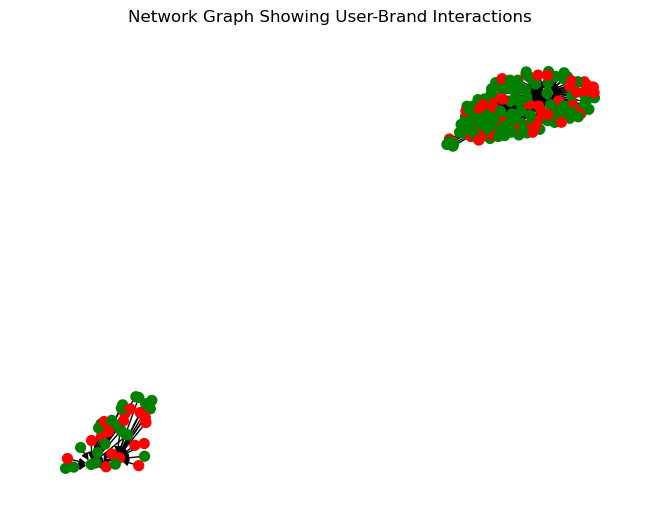

Graph saved as 'network_graph.graphml'.
LDA Topics from Positive Comments:
Topic #1: 0.023*"fenty" + 0.021*"foundation" + 0.018*"shade" + 0.016*"brand" + 0.015*"skin" + 0.011*"make" + 0.011*"find" + 0.009*"people" + 0.009*"dark" + 0.009*"love"
Topic #2: 0.021*"fenty" + 0.017*"kimono" + 0.015*"beauty" + 0.012*"japanese" + 0.008*"asian" + 0.007*"people" + 0.007*"think" + 0.006*"one" + 0.006*"clothing" + 0.006*"brand"
Topic #3: 0.030*"fenty" + 0.019*"beauty" + 0.019*"love" + 0.012*"like" + 0.009*"brand" + 0.008*"good" + 0.008*"kylie" + 0.008*"video" + 0.007*"use" + 0.007*"..."
Topic #4: 0.039*"fenty" + 0.026*"shade" + 0.020*"beauty" + 0.013*"brand" + 0.012*"foundation" + 0.011*"video" + 0.009*"range" + 0.009*"product" + 0.008*"im" + 0.008*"❤"
Topic #5: 0.020*"skin" + 0.015*"fenty" + 0.010*"shade" + 0.008*"tirtir" + 0.008*"match" + 0.008*"👏🏼" + 0.005*"one" + 0.005*"…" + 0.005*"care" + 0.005*"got"


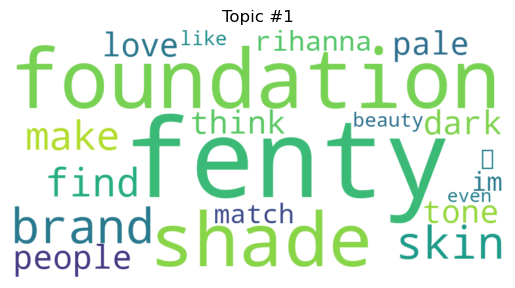

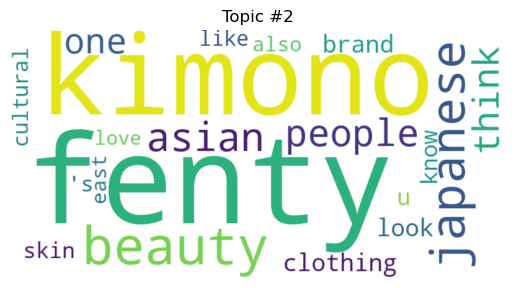

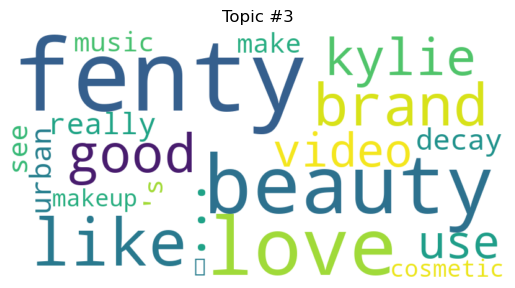

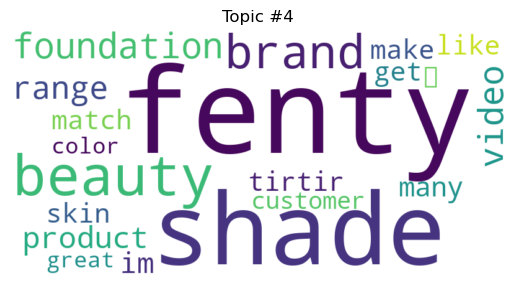

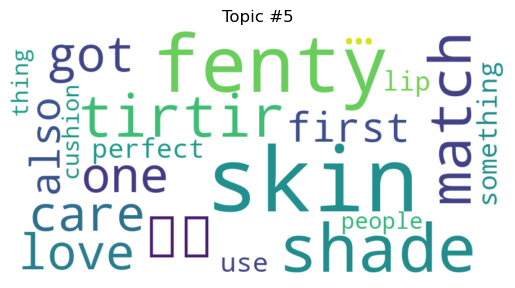

In [164]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from wordcloud import WordCloud
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')

def extract_user_comments(df, platform, brand_list):
    """Extract comments and the corresponding authors that mention the given brands with sentiment analysis."""
    sia = SentimentIntensityAnalyzer()  # Initialize the sentiment analyzer
    data = []
    for index, row in df.iterrows():
        content = row.get('text', '') or row.get('title', '')
        author = row.get('author', 'Unknown')
        if isinstance(content, str):
            sentiment_score = sia.polarity_scores(content)['compound']
            sentiment = 'positive' if sentiment_score > 0.05 else 'negative' if sentiment_score < -0.05 else 'neutral'
            for brand in brand_list:
                if brand.lower() in content.lower():
                    data.append({
                        'platform': platform,
                        'author': author,
                        'brand': brand,
                        'comment': content,
                        'sentiment': sentiment  # Include sentiment in the data
                    })
    return data

def build_network_graph(data):
    """Build a directed graph from the extracted data including sentiment."""
    G = nx.DiGraph()
    for entry in data:
        author_node = f"{entry['platform']}_{entry['author']}"
        brand_node = f"{entry['brand']}"
        G.add_node(author_node, type='user', platform=entry['platform'], sentiment=entry['sentiment'])
        G.add_node(brand_node, type='brand', name=entry['brand'])
        G.add_edge(author_node, brand_node, comment=entry['comment'])
    return G

def simulate_icm(graph, seed_nodes, activation_probability=0.1, steps=10):
    """Simulate the Independent Cascade Model on a network."""
    active_nodes = set(seed_nodes)
    newly_active_nodes = set(seed_nodes)

    for _ in range(steps):
        current_newly_active_nodes = set()
        for node in newly_active_nodes:
            neighbors = graph.neighbors(node)
            for neighbor in neighbors:
                if neighbor not in active_nodes and random.random() < activation_probability:
                    active_nodes.add(neighbor)
                    current_newly_active_nodes.add(neighbor)
        newly_active_nodes = current_newly_active_nodes
    return active_nodes

def draw_network_graph(graph, active_nodes):
    """Draw the network graph using matplotlib with specific coloring for active nodes."""
    pos = nx.spring_layout(graph, seed=42)
    node_colors = ['green' if node in active_nodes else 'red' for node in graph]
    nx.draw(graph, pos, node_color=node_colors, node_size=50, with_labels=False)
    plt.title("Network Graph Showing User-Brand Interactions")
    plt.show()

# Load data
reddit_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_western.csv')  # Western data
youtube_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_youtube_western.csv')  # Western data
reddit_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_asian.csv')  # Asian data
youtube_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_youtube_asian.csv')  # Asian data

# Define brands
western_brands = ['fenty', 'urban decay']
asian_brands = ['tirtir', 'shiseido']
all_brands = western_brands + asian_brands

# Collect comments mentioning the brands
all_data = extract_user_comments(reddit_data_western, 'Reddit_Western', western_brands) + \
           extract_user_comments(youtube_data_western, 'YouTube_Western', western_brands) + \
           extract_user_comments(reddit_data_asian, 'Reddit_Asian', asian_brands) + \
           extract_user_comments(youtube_data_asian, 'YouTube_Asian', asian_brands)

# Build the network graph from the data
G = build_network_graph(all_data)

# Identify seed nodes for the ICM (nodes with positive comments)
seed_nodes = [n for n in G if G.nodes[n]['type'] == 'user' and G.nodes[n]['sentiment'] == 'positive']

# Perform the ICM simulation
active_nodes = simulate_icm(G, seed_nodes)

# Draw the network graph
draw_network_graph(G, active_nodes)


# Save the graph to a GraphML file for use in Gephi
nx.write_graphml(G, 'network_graph.graphml')
print("Graph saved as 'network_graph.graphml'.")


# Extract positive comments for LDA
positive_comments = [entry['comment'] for entry in all_data if entry['sentiment'] == 'positive']

# Preprocess comments
stop_words = set(stopwords.words('english'))
def preprocess_texts(texts):
    processed_texts = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
        processed_texts.append(tokens)
    return processed_texts

# Preprocess positive comments
positive_processed = preprocess_texts(positive_comments)

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(positive_processed)
corpus = [dictionary.doc2bow(text) for text in positive_processed]

# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print LDA topics
print("LDA Topics from Positive Comments:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic #{idx + 1}: {topic}")

# Generate Word Clouds for LDA topics
def plot_lda_word_cloud(lda_model, num_topics):
    for t in range(num_topics):
        plt.figure()
        topic = lda_model.show_topic(t, topn=20)
        topic_dict = {word: float(value) for word, value in topic}
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_dict)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Topic #{t + 1}')
        plt.show()

# Plot LDA word clouds for positive comments
plot_lda_word_cloud(lda_model, 5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LDA Topics for Positive Comments - Western Beauty Brands:


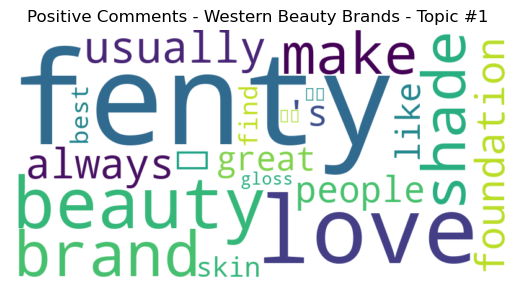

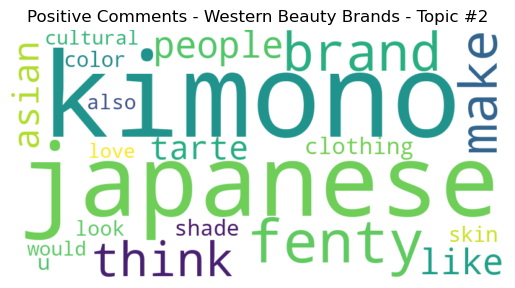

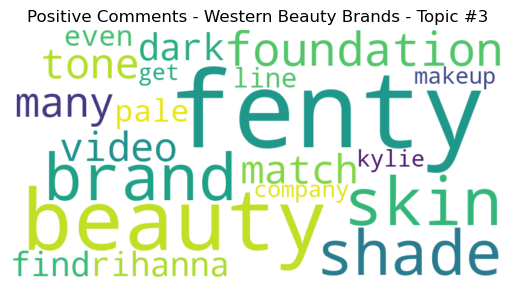

LDA Topics for Negative Comments - Western Beauty Brands:


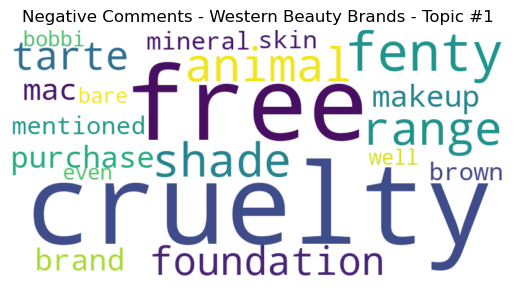

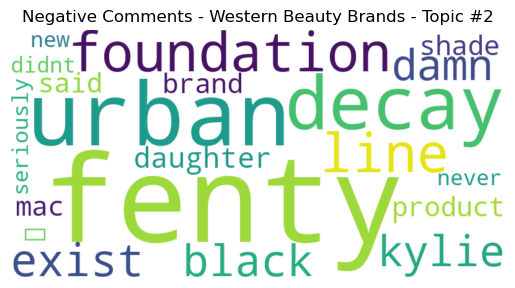

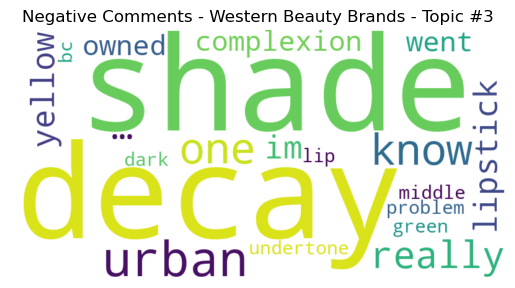

LDA Topics for Positive Comments - Asian Beauty Brands:


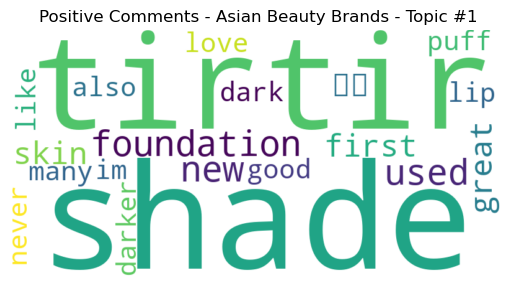

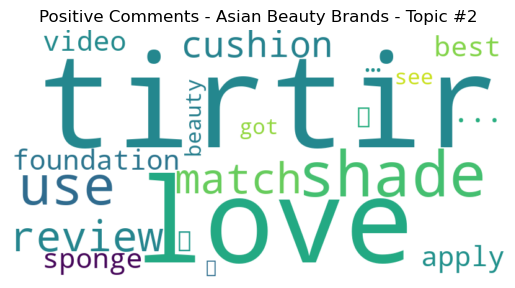

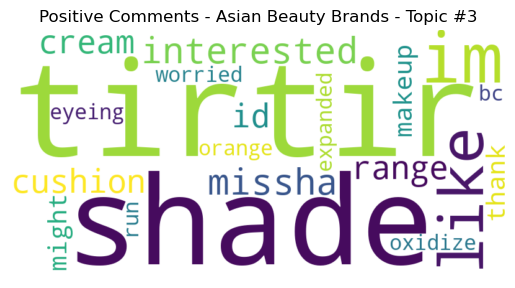

LDA Topics for Negative Comments - Asian Beauty Brands:


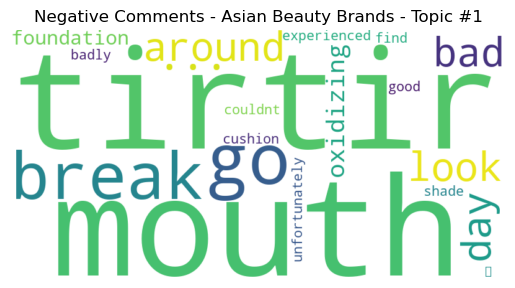

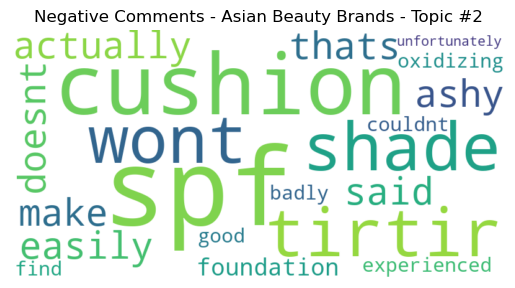

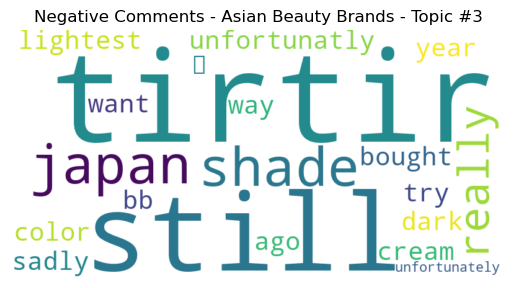

In [168]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load your data
reddit_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_western.csv')
youtube_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_youtube_western.csv')
reddit_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_asian.csv')
youtube_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_youtube_asian.csv')

# Combine text data
western_texts = reddit_data_western['comment_body'].tolist() + youtube_data_western['text'].tolist()
asian_texts = reddit_data_asian['comment_body'].tolist() + youtube_data_asian['text'].tolist()

# Relevant keywords for filtering
key_terms = ["inclusivity", "diversity", "shade range", "skin tone", "representation"]

# Preprocess and filter texts based on keywords
stop_words = set(stopwords.words('english'))
def preprocess_filter(texts):
    processed_texts = []
    for text in texts:
        # Check if the text is a string and not empty or NaN
        if isinstance(text, str) and text.strip():
            tokens = word_tokenize(text.lower())
            tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
            # Check if any key terms are in the tokens
            if any(term in tokens for term in key_terms):
                processed_texts.append(tokens)
    return processed_texts

# Now run the preprocessing again with the updated function
western_inclusive = preprocess_filter(western_texts)
asian_inclusive = preprocess_filter(asian_texts)

# Create dictionary and corpus
dictionary_western = corpora.Dictionary(western_inclusive)
corpus_western = [dictionary_western.doc2bow(text) for text in western_inclusive]
dictionary_asian = corpora.Dictionary(asian_inclusive)
corpus_asian = [dictionary_asian.doc2bow(text) for text in asian_inclusive]

# LDA models
lda_western = models.LdaModel(corpus_western, num_topics=5, id2word=dictionary_western, passes=15)
lda_asian = models.LdaModel(corpus_asian, num_topics=5, id2word=dictionary_asian, passes=15)

# Analyzing topics
def print_topics(lda_model):
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic #{idx + 1}: {topic}")

print("Western Beauty Brand Topics:")
print_topics(lda_western)
print("\nAsian Beauty Brand Topics:")
print_topics(lda_asian)

# Sentiment analysis on filtered texts
sia = SentimentIntensityAnalyzer()

# Function to get positive sentiment texts
def get_positive_texts(texts):
    positive_texts = []
    for text in texts:
        joined_text = ' '.join(text)  # Joining tokens into a single string
        sentiment_score = sia.polarity_scores(joined_text)['compound']
        if sentiment_score > 0.05:  # Positive sentiment threshold
            positive_texts.append(joined_text)
    return positive_texts

# Get positive texts for both Western and Asian filtered comments
western_positive_texts = get_positive_texts(western_inclusive)
asian_positive_texts = get_positive_texts(asian_inclusive)

# Plotting word cloud for positive comments
def plot_positive_word_cloud(positive_texts, title):
    all_text = ' '.join(positive_texts)
    word_cloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Plot word clouds for positive sentiment comments for Western and Asian data
print("Word Cloud for Positive Sentiments - Western Beauty Brands:")
plot_positive_word_cloud(western_positive_texts, "Positive Sentiments - Western Beauty Brands")

print("Word Cloud for Positive Sentiments - Asian Beauty Brands:")
plot_positive_word_cloud(asian_positive_texts, "Positive Sentiments - Asian Beauty Brands")


In [ ]:
LDA for Q2

Western Beauty Brand Topics:
Topic #1: 0.013*"people" + 0.011*"brand" + 0.011*"like" + 0.011*"dont" + 0.009*"shade" + 0.009*"im" + 0.009*"inclusivity" + 0.008*"diversity" + 0.008*"product" + 0.007*"think"
Topic #2: 0.015*"like" + 0.009*"hair" + 0.008*"game" + 0.008*"people" + 0.007*"diversity" + 0.007*"one" + 0.006*"even" + 0.006*"brand" + 0.006*"want" + 0.005*"see"
Topic #3: 0.012*"like" + 0.011*"brand" + 0.008*"shade" + 0.008*"asian" + 0.008*"diversity" + 0.007*"inclusivity" + 0.006*"makeup" + 0.006*"feel" + 0.006*"people" + 0.006*"im"
Topic #4: 0.014*"brand" + 0.012*"shade" + 0.009*"inclusivity" + 0.008*"range" + 0.008*"dont" + 0.007*"product" + 0.007*"people" + 0.006*"im" + 0.006*"skin" + 0.006*"fenty"
Topic #5: 0.009*"like" + 0.009*"trans" + 0.008*"representation" + 0.008*"really" + 0.007*"brand" + 0.007*"woman" + 0.007*"one" + 0.007*"shade" + 0.007*"people" + 0.007*"think"

Asian Beauty Brand Topics:
Topic #1: 0.015*"diversity" + 0.010*"skin" + 0.010*"cushion" + 0.008*"korean" + 

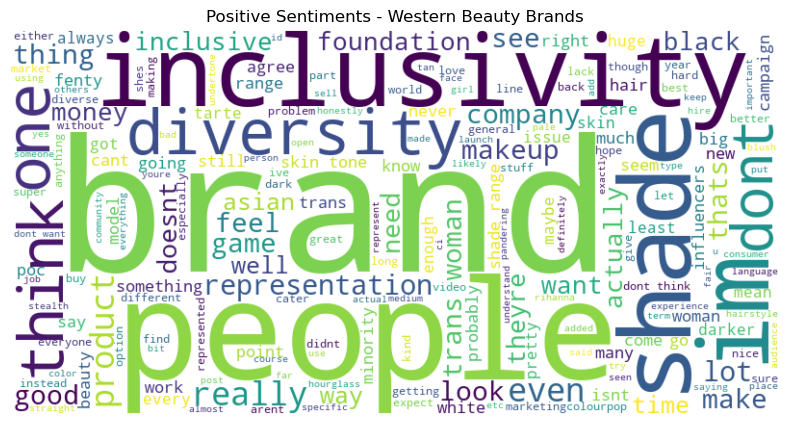

Word Cloud for Positive Sentiments - Asian Beauty Brands:


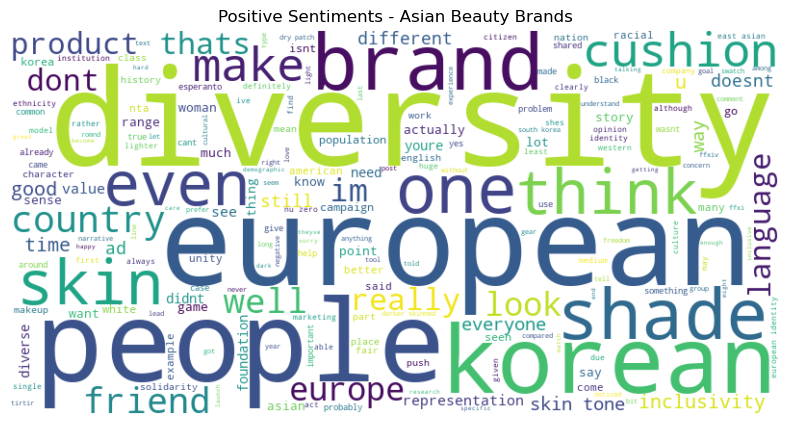

In [162]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

reddit_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_western.csv')
youtube_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_youtube_western.csv')
reddit_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_asian.csv')
youtube_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_youtube_asian.csv')

# Combine text data
western_texts = reddit_data_western['comment_body'].tolist() + youtube_data_western['text'].tolist()
asian_texts = reddit_data_asian['comment_body'].tolist() + youtube_data_asian['text'].tolist()

# Relevant keywords for filtering
key_terms = ["inclusivity", "diversity", "shade range", "skin tone", "representation"]

# Preprocess and filter texts based on keywords
stop_words = set(stopwords.words('english'))
def preprocess_filter(texts):
    processed_texts = []
    for text in texts:
        # Check if the text is a string and not empty or NaN
        if isinstance(text, str) and text.strip():
            tokens = word_tokenize(text.lower())
            tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
            # Check if any key terms are in the tokens
            if any(term in tokens for term in key_terms):
                processed_texts.append(tokens)
    return processed_texts

# Now run the preprocessing again with the updated function
western_inclusive = preprocess_filter(western_texts)
asian_inclusive = preprocess_filter(asian_texts)

# Create dictionary and corpus
dictionary_western = corpora.Dictionary(western_inclusive)
corpus_western = [dictionary_western.doc2bow(text) for text in western_inclusive]
dictionary_asian = corpora.Dictionary(asian_inclusive)
corpus_asian = [dictionary_asian.doc2bow(text) for text in asian_inclusive]

# LDA models
lda_western = models.LdaModel(corpus_western, num_topics=5, id2word=dictionary_western, passes=15)
lda_asian = models.LdaModel(corpus_asian, num_topics=5, id2word=dictionary_asian, passes=15)

# Analyzing topics
def print_topics(lda_model):
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic #{idx + 1}: {topic}")

print("Western Beauty Brand Topics:")
print_topics(lda_western)
print("\nAsian Beauty Brand Topics:")
print_topics(lda_asian)

# Sentiment analysis on filtered texts
sia = SentimentIntensityAnalyzer()

# Function to get positive sentiment texts
def get_positive_texts(texts):
    positive_texts = []
    for text in texts:
        joined_text = ' '.join(text)  # Joining tokens into a single string
        sentiment_score = sia.polarity_scores(joined_text)['compound']
        if sentiment_score > 0.05:  # Positive sentiment threshold
            positive_texts.append(joined_text)
    return positive_texts

# Get positive texts for both Western and Asian filtered comments
western_positive_texts = get_positive_texts(western_inclusive)
asian_positive_texts = get_positive_texts(asian_inclusive)

# Plotting word cloud for positive comments
def plot_positive_word_cloud(positive_texts, title):
    all_text = ' '.join(positive_texts)
    word_cloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Plot word clouds for positive sentiment comments for Western and Asian data
print("Word Cloud for Positive Sentiments - Western Beauty Brands:")
plot_positive_word_cloud(western_positive_texts, "Positive Sentiments - Western Beauty Brands")

print("Word Cloud for Positive Sentiments - Asian Beauty Brands:")
plot_positive_word_cloud(asian_positive_texts, "Positive Sentiments - Asian Beauty Brands")


In [ ]:
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
import string

texts = [[word for word in document.lower().split() if word not in set(stopwords.words('english'))]
         for document in comments]

# Creating a dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Running LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


In [ ]:
reddit q2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LDA Topics for Positive Comments - Western Beauty Brands:


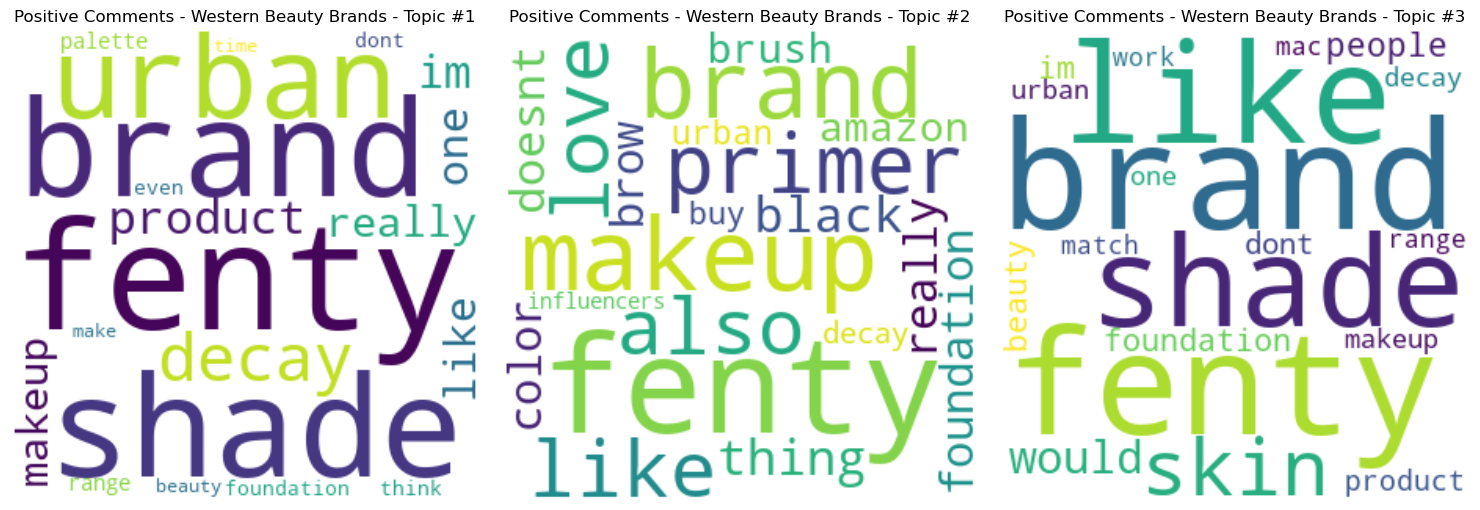

LDA Topics for Negative Comments - Western Beauty Brands:


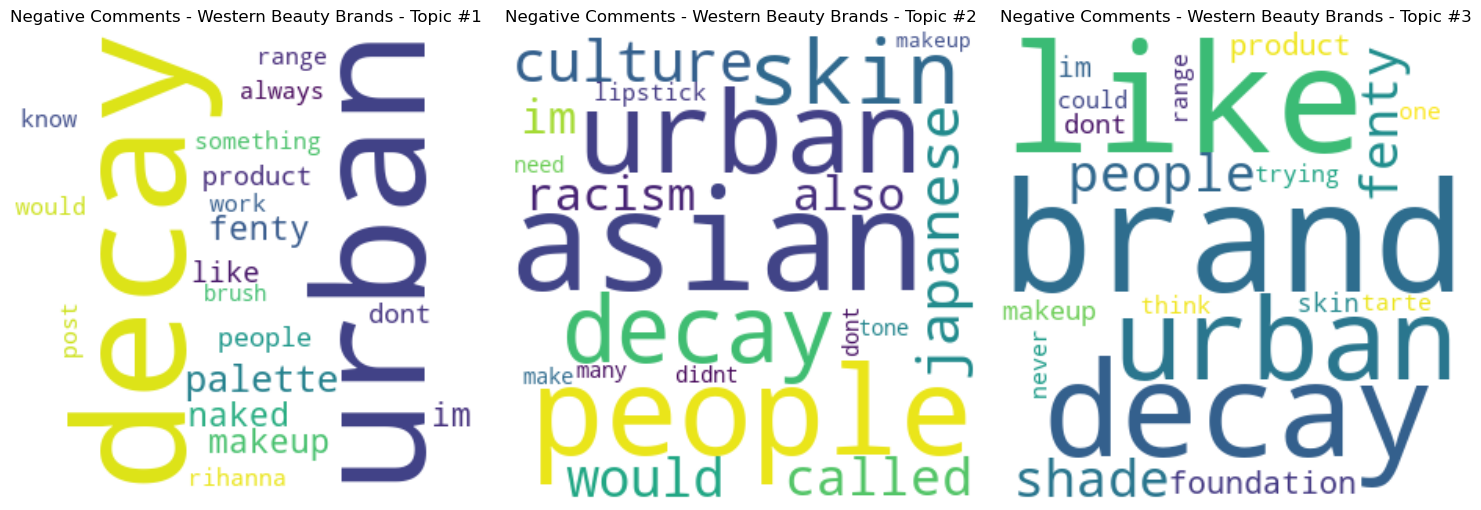

LDA Topics for Positive Comments - Asian Beauty Brands:


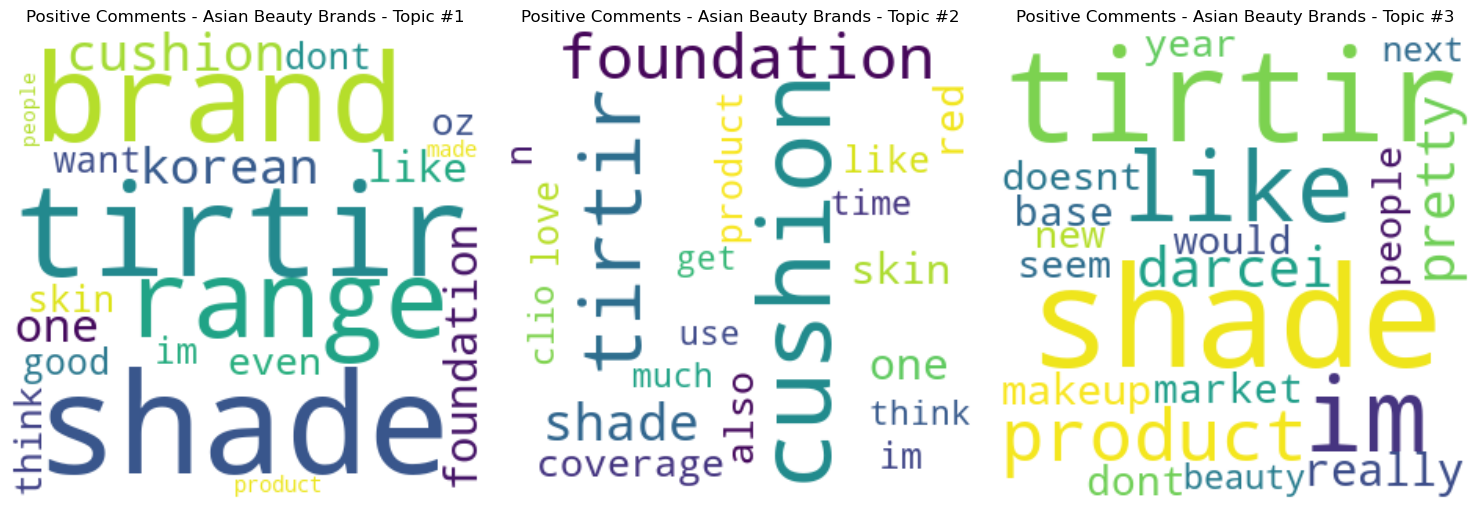

LDA Topics for Negative Comments - Asian Beauty Brands:


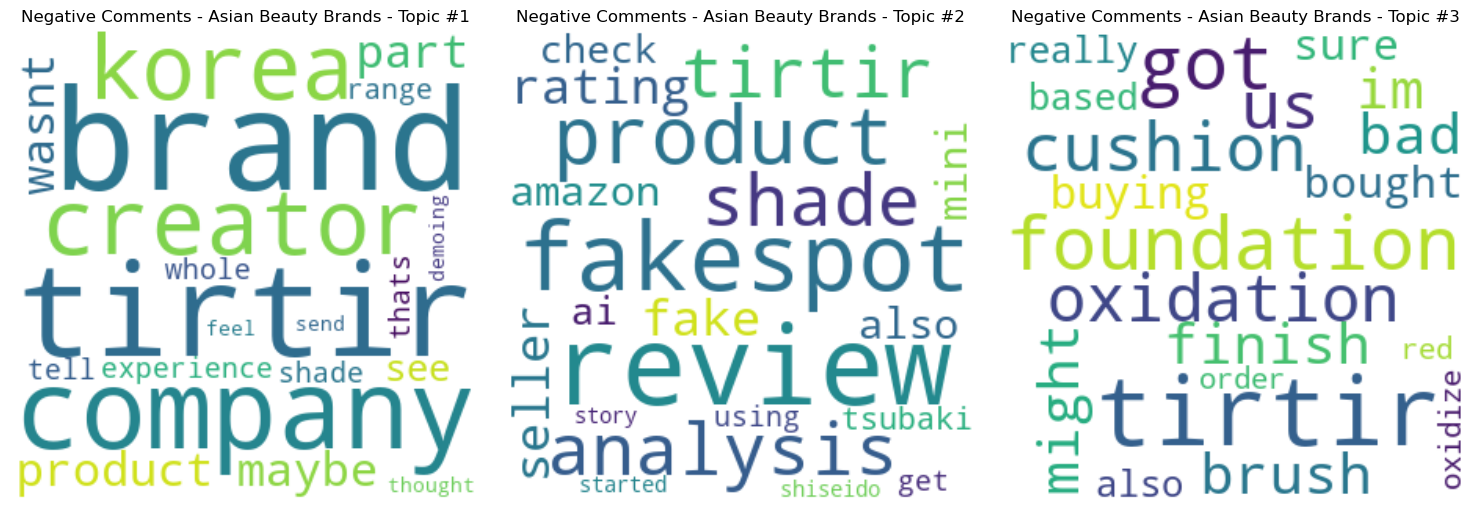

In [183]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from wordcloud import WordCloud
import string
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load data
reddit_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_western.csv')
reddit_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_asian.csv')

# Define brands
western_brands = ['fenty', 'urban decay']
asian_brands = ['tirtir', 'shiseido']

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to extract Reddit comments and corresponding authors with sentiment analysis
def extract_reddit_comments(df, platform, brand_list):
    data = []
    for index, row in df.iterrows():
        # Ensure we only process comment rows
        if row['type'] == 'comment': 
            content = row.get('comment_body', '')  # Use comment body
            author = row.get('comment_author', 'Unknown')  # Use comment author
            if isinstance(content, str) and content.strip():  # Ensure content is not empty
                sentiment_score = sia.polarity_scores(content)['compound']
                sentiment = 'positive' if sentiment_score > 0.05 else 'negative' if sentiment_score < -0.05 else 'neutral'
                for brand in brand_list:
                    if brand.lower() in content.lower():
                        data.append({
                            'platform': platform,
                            'author': author,
                            'brand': brand,
                            'comment': content,
                            'sentiment': sentiment,  # Include sentiment in the data
                            'post_created_date': row.get('post_created_date', ''),
                            'post_url': row.get('post_url', ''),
                            'post_subreddit': row.get('post_subreddit', '')
                        })
    return data

# Extract comments mentioning the brands
reddit_western_data = extract_reddit_comments(reddit_data_western, 'Reddit_Western', western_brands)
reddit_asian_data = extract_reddit_comments(reddit_data_asian, 'Reddit_Asian', asian_brands)

# Combine both data
all_data = reddit_western_data + reddit_asian_data

# Extract positive and negative comments for Western brands
western_positive_comments = [entry['comment'] for entry in reddit_western_data if entry['sentiment'] == 'positive']
western_negative_comments = [entry['comment'] for entry in reddit_western_data if entry['sentiment'] == 'negative']

# Extract positive and negative comments for Asian brands
asian_positive_comments = [entry['comment'] for entry in reddit_asian_data if entry['sentiment'] == 'positive']
asian_negative_comments = [entry['comment'] for entry in reddit_asian_data if entry['sentiment'] == 'negative']

# Preprocess comments for LDA
stop_words = set(stopwords.words('english'))
def preprocess_texts(texts):
    processed_texts = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
        processed_texts.append(tokens)
    return processed_texts

# Preprocess comments
western_positive_processed = preprocess_texts(western_positive_comments)
western_negative_processed = preprocess_texts(western_negative_comments)
asian_positive_processed = preprocess_texts(asian_positive_comments)
asian_negative_processed = preprocess_texts(asian_negative_comments)

# Function to perform LDA and generate word cloud for topics
# Function to perform LDA and generate word cloud for topics
def perform_lda_and_generate_word_cloud(processed_texts, num_topics, title_prefix, file_name):
    # Create dictionary and corpus for LDA
    dictionary = corpora.Dictionary(processed_texts)
    corpus = [dictionary.doc2bow(text) for text in processed_texts]

    # Apply LDA
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Generate word clouds for each topic in a single line
    fig, axes = plt.subplots(1, num_topics, figsize=(15, 5))  # Adjust subplot size
    for t in range(num_topics):
        topic = lda_model.show_topic(t, topn=20)
        topic_dict = {word: float(value) for word, value in topic}
        wc = WordCloud(width=300, height=300, background_color='white').generate_from_frequencies(topic_dict)
        axes[t].imshow(wc, interpolation='bilinear')
        axes[t].axis("off")
        axes[t].set_title(f'{title_prefix} - Topic #{t + 1}')
    plt.tight_layout()
    plt.savefig(file_name)  # Save the figure
    plt.show()


# Perform LDA and generate word clouds for each set of comments
print("LDA Topics for Positive Comments - Western Beauty Brands:")
perform_lda_and_generate_word_cloud(western_positive_processed, num_topics=3, title_prefix="Positive Comments - Western Beauty Brands", file_name="Q2/Western_Positive_WordCloud.png")

print("LDA Topics for Negative Comments - Western Beauty Brands:")
perform_lda_and_generate_word_cloud(western_negative_processed, num_topics=3, title_prefix="Negative Comments - Western Beauty Brands", file_name="Q2/Western_Negative_WordCloud.png")

print("LDA Topics for Positive Comments - Asian Beauty Brands:")
perform_lda_and_generate_word_cloud(asian_positive_processed, num_topics=3, title_prefix="Positive Comments - Asian Beauty Brands", file_name="Q2/Asian_Positive_WordCloud.png")

print("LDA Topics for Negative Comments - Asian Beauty Brands:")
perform_lda_and_generate_word_cloud(asian_negative_processed, num_topics=3, title_prefix="Negative Comments - Asian Beauty Brands", file_name="Q2/Asian_Negative_WordCloud.png")


In [ ]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

def extract_reddit_comments(df, platform, brand_list):
    """Extract comments and the corresponding authors from Reddit that mention the given brands, including sentiment analysis."""
    sia = SentimentIntensityAnalyzer()  # Initialize the sentiment analyzer
    data = []
    for index, row in df.iterrows():
        # Reddit comments might use 'text' for comments and 'title' for post titles, handle both
        content = row.get('text', '') or row.get('title', '')
        # Reddit uses 'comment_author' for comments, adjust accordingly
        author = row.get('comment_author', 'Unknown')
        if isinstance(content, str):
            sentiment_score = sia.polarity_scores(content)['compound']
            sentiment = 'positive' if sentiment_score > 0.05 else 'negative' if sentiment_score < -0.05 else 'neutral'
            for brand in brand_list:
                if brand.lower() in content.lower():
                    data.append({
                        'platform': platform,
                        'author': author,
                        'brand': brand,
                        'comment': content,
                        'sentiment': sentiment
                    })
    return data

def build_network_graph(data):
    """Build a directed graph from the extracted data including sentiment."""
    G = nx.DiGraph()
    for entry in data:
        author_node = f"{entry['platform']}_{entry['author']}"
        brand_node = f"{entry['brand']}"
        G.add_node(author_node, type='user', platform=entry['platform'], sentiment=entry['sentiment'])
        G.add_node(brand_node, type='brand', name=entry['brand'])
        G.add_edge(author_node, brand_node, comment=entry['comment'])
    return G

def simulate_icm(graph, seed_nodes, activation_probability=0.1, steps=10):
    """Simulate the Independent Cascade Model on a network."""
    active_nodes = set(seed_nodes)
    newly_active_nodes = set(seed_nodes)

    for _ in range(steps):
        current_newly_active_nodes = set()
        for node in newly_active_nodes:
            neighbors = graph.neighbors(node)
            for neighbor in neighbors:
                if neighbor not in active_nodes and random.random() < activation_probability:
                    active_nodes.add(neighbor)
                    current_newly_active_nodes.add(neighbor)
        newly_active_nodes = current_newly_active_nodes
    return active_nodes

def draw_network_graph(graph, active_nodes):
    """Draw the network graph using matplotlib with specific coloring for active nodes."""
    pos = nx.spring_layout(graph, seed=42)
    node_colors = ['green' if node in active_nodes else 'red' for node in graph]
    nx.draw(graph, pos, node_color=node_colors, node_size=50, with_labels=False)
    plt.title("Network Graph Showing User-Brand Interactions")
    plt.show()

# Load data
reddit_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_western.csv')
reddit_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_asian.csv')

# Define brands
western_brands = ['fenty', 'urban decay']
asian_brands = ['tirtir', 'shiseido']
all_brands = western_brands + asian_brands

# Collect comments mentioning the brands from Reddit only
reddit_comments_western = extract_reddit_comments(reddit_data_western, 'Reddit_Western', western_brands)
reddit_comments_asian = extract_reddit_comments(reddit_data_asian, 'Reddit_Asian', asian_brands)

# Combine all Reddit data
all_reddit_comments = reddit_comments_western + reddit_comments_asian

# Display Reddit comments, authors, and the brands they mentioned
for comment in all_reddit_comments:
    print(f"Author: {comment['author']}, Brand: {comment['brand']}, Comment: {comment['comment']}, Sentiment: {comment['sentiment']}")


# Build the network graph from the data
G = build_network_graph(all_data)

# Identify seed nodes for the ICM (nodes with positive comments)
seed_nodes = [n for n in G if G.nodes[n]['type'] == 'user' and G.nodes[n]['sentiment'] == 'positive']

# Perform the ICM simulation
active_nodes = simulate_icm(G, seed_nodes)

# Draw the network graph
draw_network_graph(G, active_nodes)

for node in G.nodes():
    G.nodes[node]['active'] = 'yes' if node in active_nodes else 'no'

# Save the graph to a GraphML file for use in Gephi
nx.write_graphml(G, 'reddit_network_graph.graphml')
print("Graph saved as 'network_graph.graphml'.")


sentiment


In [95]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

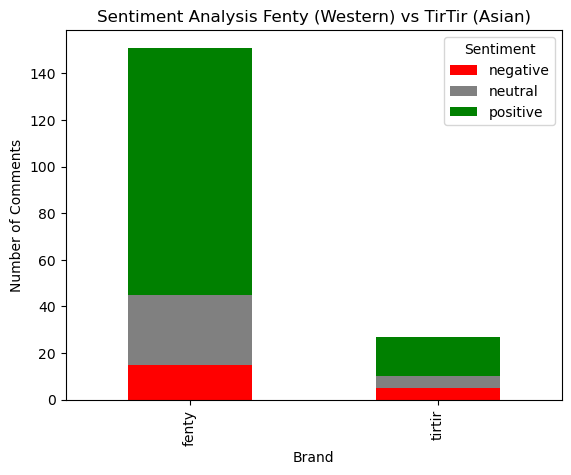

In [113]:
import pandas as pd
import networkx as nx
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

def extract_user_comments(df, platform, brand_list):
    # Initialize an empty list to store data
    data = []

    for index, row in df.iterrows():
        content = row.get('text', '') or row.get('title', '')
        author = row.get('author', 'Unknown')
        if isinstance(content, str):
            for brand in brand_list:
                if brand in content.lower():
                    sentiment_score = sia.polarity_scores(content)
                    sentiment = 'positive' if sentiment_score['compound'] > 0.05 else 'negative' if sentiment_score['compound'] < -0.05 else 'neutral'
                    # Store user, brand, comment, and sentiment in the list
                    data.append({
                        'platform': platform,
                        'author': author,
                        'brand': brand,
                        'comment': content,
                        'sentiment': sentiment
                    })

    return data
def plot_sentiments(data_frame):
    sentiment_counts = pd.crosstab(index=data_frame['brand'], columns=data_frame['sentiment'])
    sentiment_counts.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
    plt.title('Sentiment Analysis Fenty (Western) vs TirTir (Asian)')
    plt.xlabel('Brand')
    plt.ylabel('Number of Comments')
    plt.legend(title='Sentiment')
    plt.savefig('Q2/SentimentAnalysisBrands.svg')
    plt.show()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load data
reddit_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_western.csv')  # Western data
youtube_data_western = pd.read_csv('Q2/cleaned for ICM/cleaned_youtube_western.csv')  # Western data
reddit_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_reddit_asian.csv')  # Asian data
youtube_data_asian = pd.read_csv('Q2/cleaned for ICM/cleaned_youtube_asian.csv')  # Asian data

# Define brands
western_brands = ['fenty']
asian_brands = ['tirtir']
all_brands = western_brands + asian_brands

# Collect data from all sources
all_data = []
all_data.extend(extract_user_comments(reddit_data_western, 'Reddit_Western', western_brands))
all_data.extend(extract_user_comments(youtube_data_western, 'YouTube_Western', western_brands))
all_data.extend(extract_user_comments(reddit_data_asian, 'Reddit_Asian', asian_brands))
all_data.extend(extract_user_comments(youtube_data_asian, 'YouTube_Asian', asian_brands))

# Create a DataFrame from the collected data
comments_df = pd.DataFrame(all_data)
comments_df.to_csv('Q2/brand_mentions_with_comments.csv', index=False)

# Save to CSV
comments_df.to_csv('Q2/brand_mentions_with_comments.csv', index=False)
plot_sentiments(comments_df)